<h1> Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h1> Loading Dataset

In [27]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\Salary_Data.csv")


In [28]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
X=df.iloc[:,0]
Y=df.iloc[:,1]


<h1> Data Visualisation

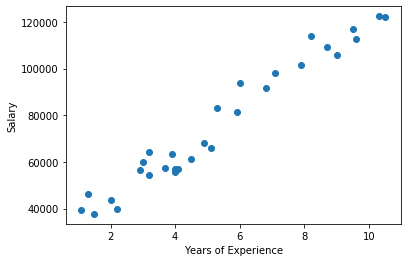

In [30]:
plt.scatter(X,Y)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,train_size=0.7,random_state=100)
train_x = train_x[:,np.newaxis]
test_x = test_x[:,np.newaxis]

<h1> Linear Regression Using Least Square Technique

In [33]:
def linearreg(X,Y):
    n=len(X)
    mx=np.mean(X)
    my=np.mean(Y)
    SS_xx=0
    SS_xy=0
    for i in range(n):
        SS_xx=SS_xx+(X[i]-mx)**2
        SS_xy=SS_xy+(X[i]-mx)*(Y[i]-my)
    m=SS_xy/SS_xx
    c=my-m*mx
    return m,c

9449.962321455077 25792.20019866869


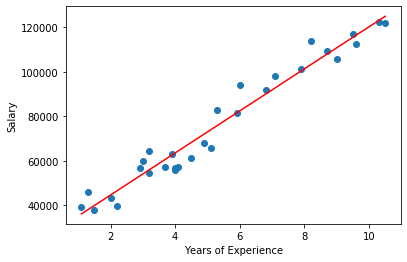

In [34]:
m,c=linearreg(X,Y)
print(m,c)
y_pred=(m*X+c)
plt.scatter(X,Y)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.plot(X,y_pred,label="regression line",color="red")
plt.show()

<h2> Error 
<h4>(using Least Square Technique)

In [35]:
from sklearn.metrics import mean_squared_error,r2_score

In [36]:
print(mean_squared_error(Y,y_pred))
print(r2_score(Y,y_pred))

31270951.72228097
0.9569566641435086


<h2> Comparison of predicted and actual values 

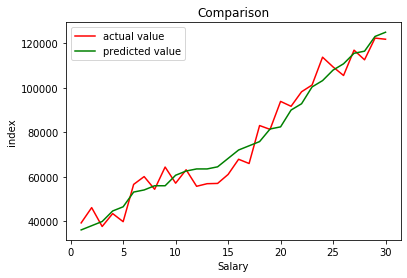

In [37]:
z = [i for i in range (1,len(Y)+1,1)]
plt.plot(z,Y,color='r',linestyle='-',label='actual value')
plt.plot(z,y_pred,color='g',linestyle='-',label='predicted value')
plt.xlabel('Salary')
plt.ylabel('index')
plt.legend()
plt.title('Comparison')
plt.show()

<h1> Linear Regression Using Sklearn Library

In [38]:
from sklearn import linear_model

In [39]:
regr=linear_model.LinearRegression()

In [40]:
regr.fit(train_x,train_y)
print(regr.coef_)
print(regr.intercept_)

[9731.20383825]
25202.887786154883


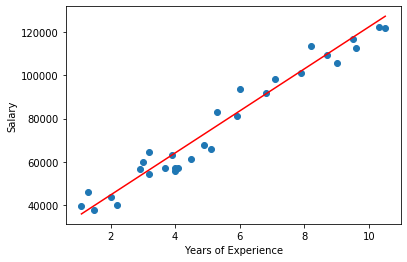

In [41]:
plt.scatter(X,Y)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.plot(X,X*regr.coef_+regr.intercept_,'-r')
plt.show()

<h2>Error

In [42]:
print(mean_squared_error(Y,X*regr.coef_+regr.intercept_))
print(r2_score(Y,X*regr.coef_+regr.intercept_))

32705789.2418414
0.9549816621095945


<h2>Comaprison of predicted and actual values

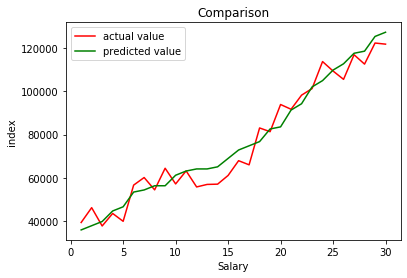

In [43]:
z = [i for i in range (1,len(Y)+1,1)]
plt.plot(z,Y,color='r',linestyle='-',label='actual value')
plt.plot(z,X*regr.coef_+regr.intercept_,color='g',linestyle='-',label='predicted value')
plt.xlabel('Salary')
plt.ylabel('index')
plt.legend()
plt.title('Comparison')
plt.show()

<h1> Linear Regression Using Gradient Descent

In [46]:
def gradientdescent(X,Y):
    m=0
    c=0
    n=float(len(X))
    L=.001   #Learning Rate
    epochs=1000
    for i in range(epochs):
        y_pred=m*X+c
        Dm=(-2/n)*(np.sum(X*(Y-y_pred)))
        Dc=(-2/n)*(np.sum(Y-y_pred))
        m=m-L*Dm
        c=c-L*Dc
        
    
        plt.plot(X,y_pred,label="regression line")
        
    return m,c

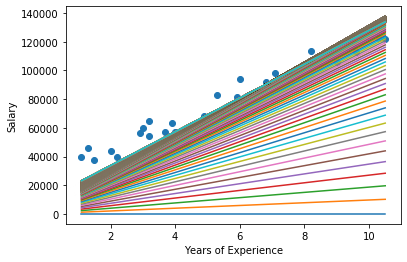

In [45]:
plt.scatter(X,Y)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
gradientdescent(X,Y)
plt.show()

11769.520009282598 10161.316588560652


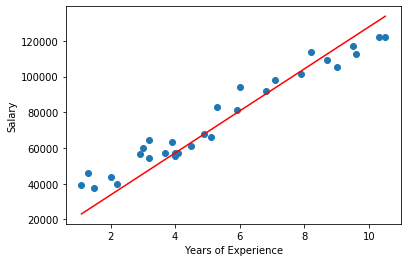

In [47]:
m,c=gradientdescent(X,Y)
print(m,c)
y_pred=(m*X+c)
plt.scatter(X,Y)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.plot(X,y_pred,label="regression line",color="red")
plt.show()

<h2> Comparison of Predicted and Actual Values

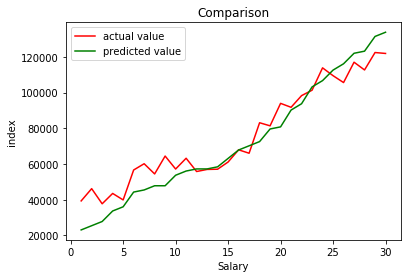

In [48]:
c = [i for i in range (1,len(Y)+1,1)]
plt.plot(c,Y,color='r',linestyle='-',label='actual value')
plt.plot(c,y_pred,color='g',linestyle='-',label='predicted value')
plt.xlabel('Salary')
plt.ylabel('index')
plt.legend()
plt.title('Comparison')
plt.show()

<h2> Error

In [49]:
print(mean_squared_error(Y,y_pred))
print(r2_score(Y,y_pred))

84089419.33650166
0.884253950739227
